# [House Price in Beijing](https://www.kaggle.com/datasets/ruiqurm/lianjia)
This project touches the edge of **big data**. This data set may be the largest public housing transaction data. You can even build your honors or master thesis on it.

After the 2008 Beijing Olympic Games, the global financial crisis hit.
China has launched a 4 trillion [stimulus program](https://en.wikipedia.org/wiki/Chinese_economic_stimulus_program). It was then observed that the housing price started to boom after 2009.
Another round of "4 trillion" led the 2022 Chinese economy. Can we learn anything from the past? There are so many questions. In this project, you will explore the data and try to discover some interesting patterns.

The data is kindly provided on Kaggle, and some people have investigated it. Feel free the explore existing code and notebooks on its Kaggle page. It is fine if you use some of the existing code, but you must **cite** it!

Before the tutorial, you may check the most voted [note](https://www.kaggle.com/code/eraw0x/house-prices-in-beijing-eda-arima). It seems incomplete but has a decent data cleaning scheme and some very cool plots. It is in `R` though. But you can get the idea.

## 1.0 Import the library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
!pip install folium ## mapping Beijing
import folium
from IPython.display import display
!pip install geopandas
import geopandas as gpd
from matplotlib.patches import Patch
import statsmodels.formula.api as smf
import seaborn as sns
from tabulate import tabulate

## 2.0 Import data and data description

In [ ]:
file_path ="https://www.dropbox.com/scl/fi/tshi5ohg9bzohblwe8oju/new.csv?rlkey=rt7n1n83xvabdfnvfyy30tuj4&dl=1"
df = pd.read_csv(file_path, encoding = 'GB2312', low_memory = False)
# GB2312(simplified Chinese character encoding standard)
# low_memory: This parameter can help avoid memory errors when working with very large data or when the data has mixed data types.

In [ ]:
# how many obs in dataset
print(df.shape[0])

318851


In [ ]:
# how many variables in dataset with each type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   url                  318851 non-null  object 
 1   id                   318851 non-null  object 
 2   Lng                  318851 non-null  float64
 3   Lat                  318851 non-null  float64
 4   Cid                  318851 non-null  int64  
 5   tradeTime            318851 non-null  object 
 6   DOM                  160874 non-null  float64
 7   followers            318851 non-null  int64  
 8   totalPrice           318851 non-null  float64
 9   price                318851 non-null  int64  
 10  square               318851 non-null  float64
 11  livingRoom           318851 non-null  object 
 12  drawingRoom          318851 non-null  object 
 13  kitchen              318851 non-null  int64  
 14  bathRoom             318851 non-null  object 
 15  floor            

## 3.0 Data Cleaning

### 3.1 Geospatial Data Validation
#### Determine the authenticity of the district in the data set

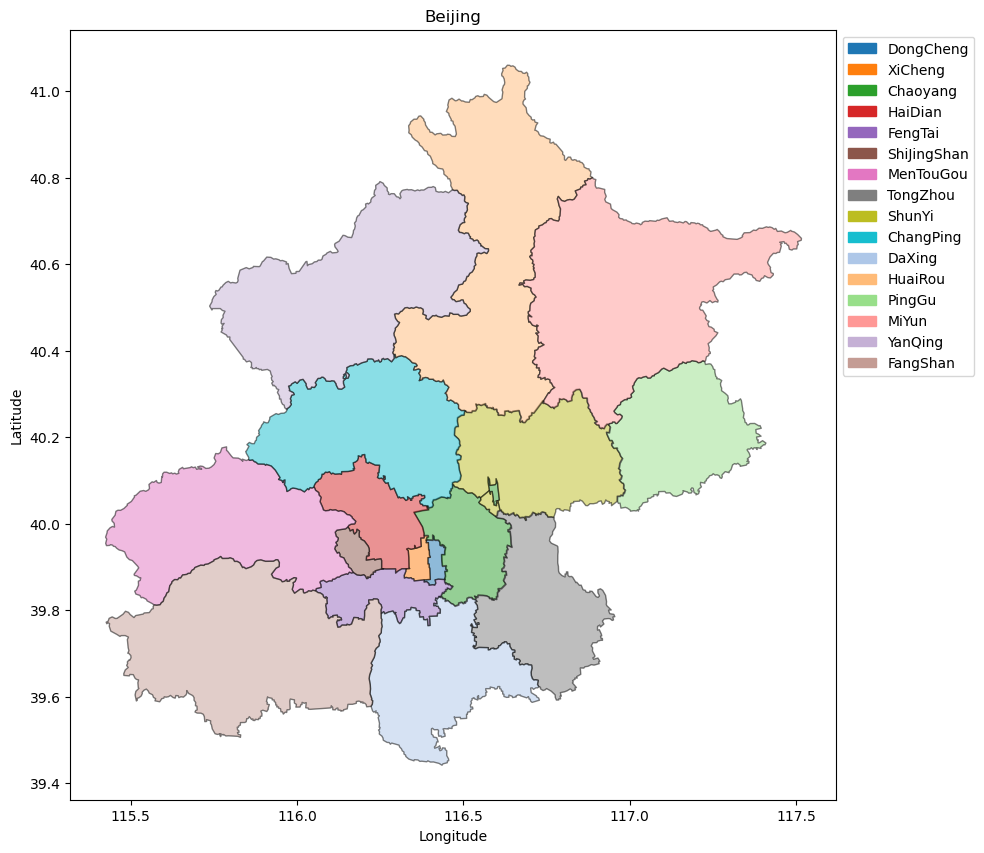

In [ ]:
gdf = gpd.read_file("https://www.dropbox.com/scl/fi/emnjc6u7bnbxx3s18h9js/beijing.json?rlkey=9afbyqmgoco4n5g2t6vhph0qn&dl=1")

# Define the mapping relationship between district names and Matplotlib color codes
region_colors = {
    "东城区": "#1f77b4",
    "西城区": "#ff7f0e",
    "朝阳区": "#2ca02c",
    "海淀区": "#d62728",
    "丰台区": "#9467bd",
    "石景山区": "#8c564b",
    "门头沟区": "#e377c2",
    "通州区": "#7f7f7f",
    "顺义区": "#bcbd22",
    "昌平区": "#17becf",
    "大兴区": "#aec7e8",
    "怀柔区": "#ffbb78",
    "平谷区": "#98df8a",
    "密云区": "#ff9896",
    "延庆区": "#c5b0d5",
    "房山区": "#c49c94"
}

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 10))

for region_name, color in region_colors.items():
    region_data = gdf[gdf['name'] == region_name]  # Filter data by name
    region_data.plot(ax=ax, color=color, label=region_name, edgecolor='k', linewidth=1, alpha=0.5)
    # Create a color block and add it to the legend item list

# Iterate through each district and set the color
legend_handles = [
    Patch(color="#1f77b4", label="DongCheng"),
    Patch(color="#ff7f0e", label="XiCheng"),
    Patch(color="#2ca02c", label="Chaoyang"),
    Patch(color="#d62728", label="HaiDian"),
    Patch(color="#9467bd", label="FengTai"),
    Patch(color="#8c564b", label="ShiJingShan"),
    Patch(color="#e377c2", label="MenTouGou"),
    Patch(color="#7f7f7f", label="TongZhou"),
    Patch(color="#bcbd22", label="ShunYi"),
    Patch(color="#17becf", label="ChangPing"),
    Patch(color="#aec7e8", label="DaXing"),
    Patch(color="#ffbb78", label="HuaiRou"),
    Patch(color="#98df8a", label="PingGu"),
    Patch(color="#ff9896", label="MiYun"),
    Patch(color="#c5b0d5", label="YanQing"),
    Patch(color="#c49c94", label="FangShan")
]

# add legend
ax.legend(handles = legend_handles, loc='upper left', bbox_to_anchor=(1, 1))

# Set graph title and axis labels
ax.set_title("Beijing")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# show graph
plt.show()

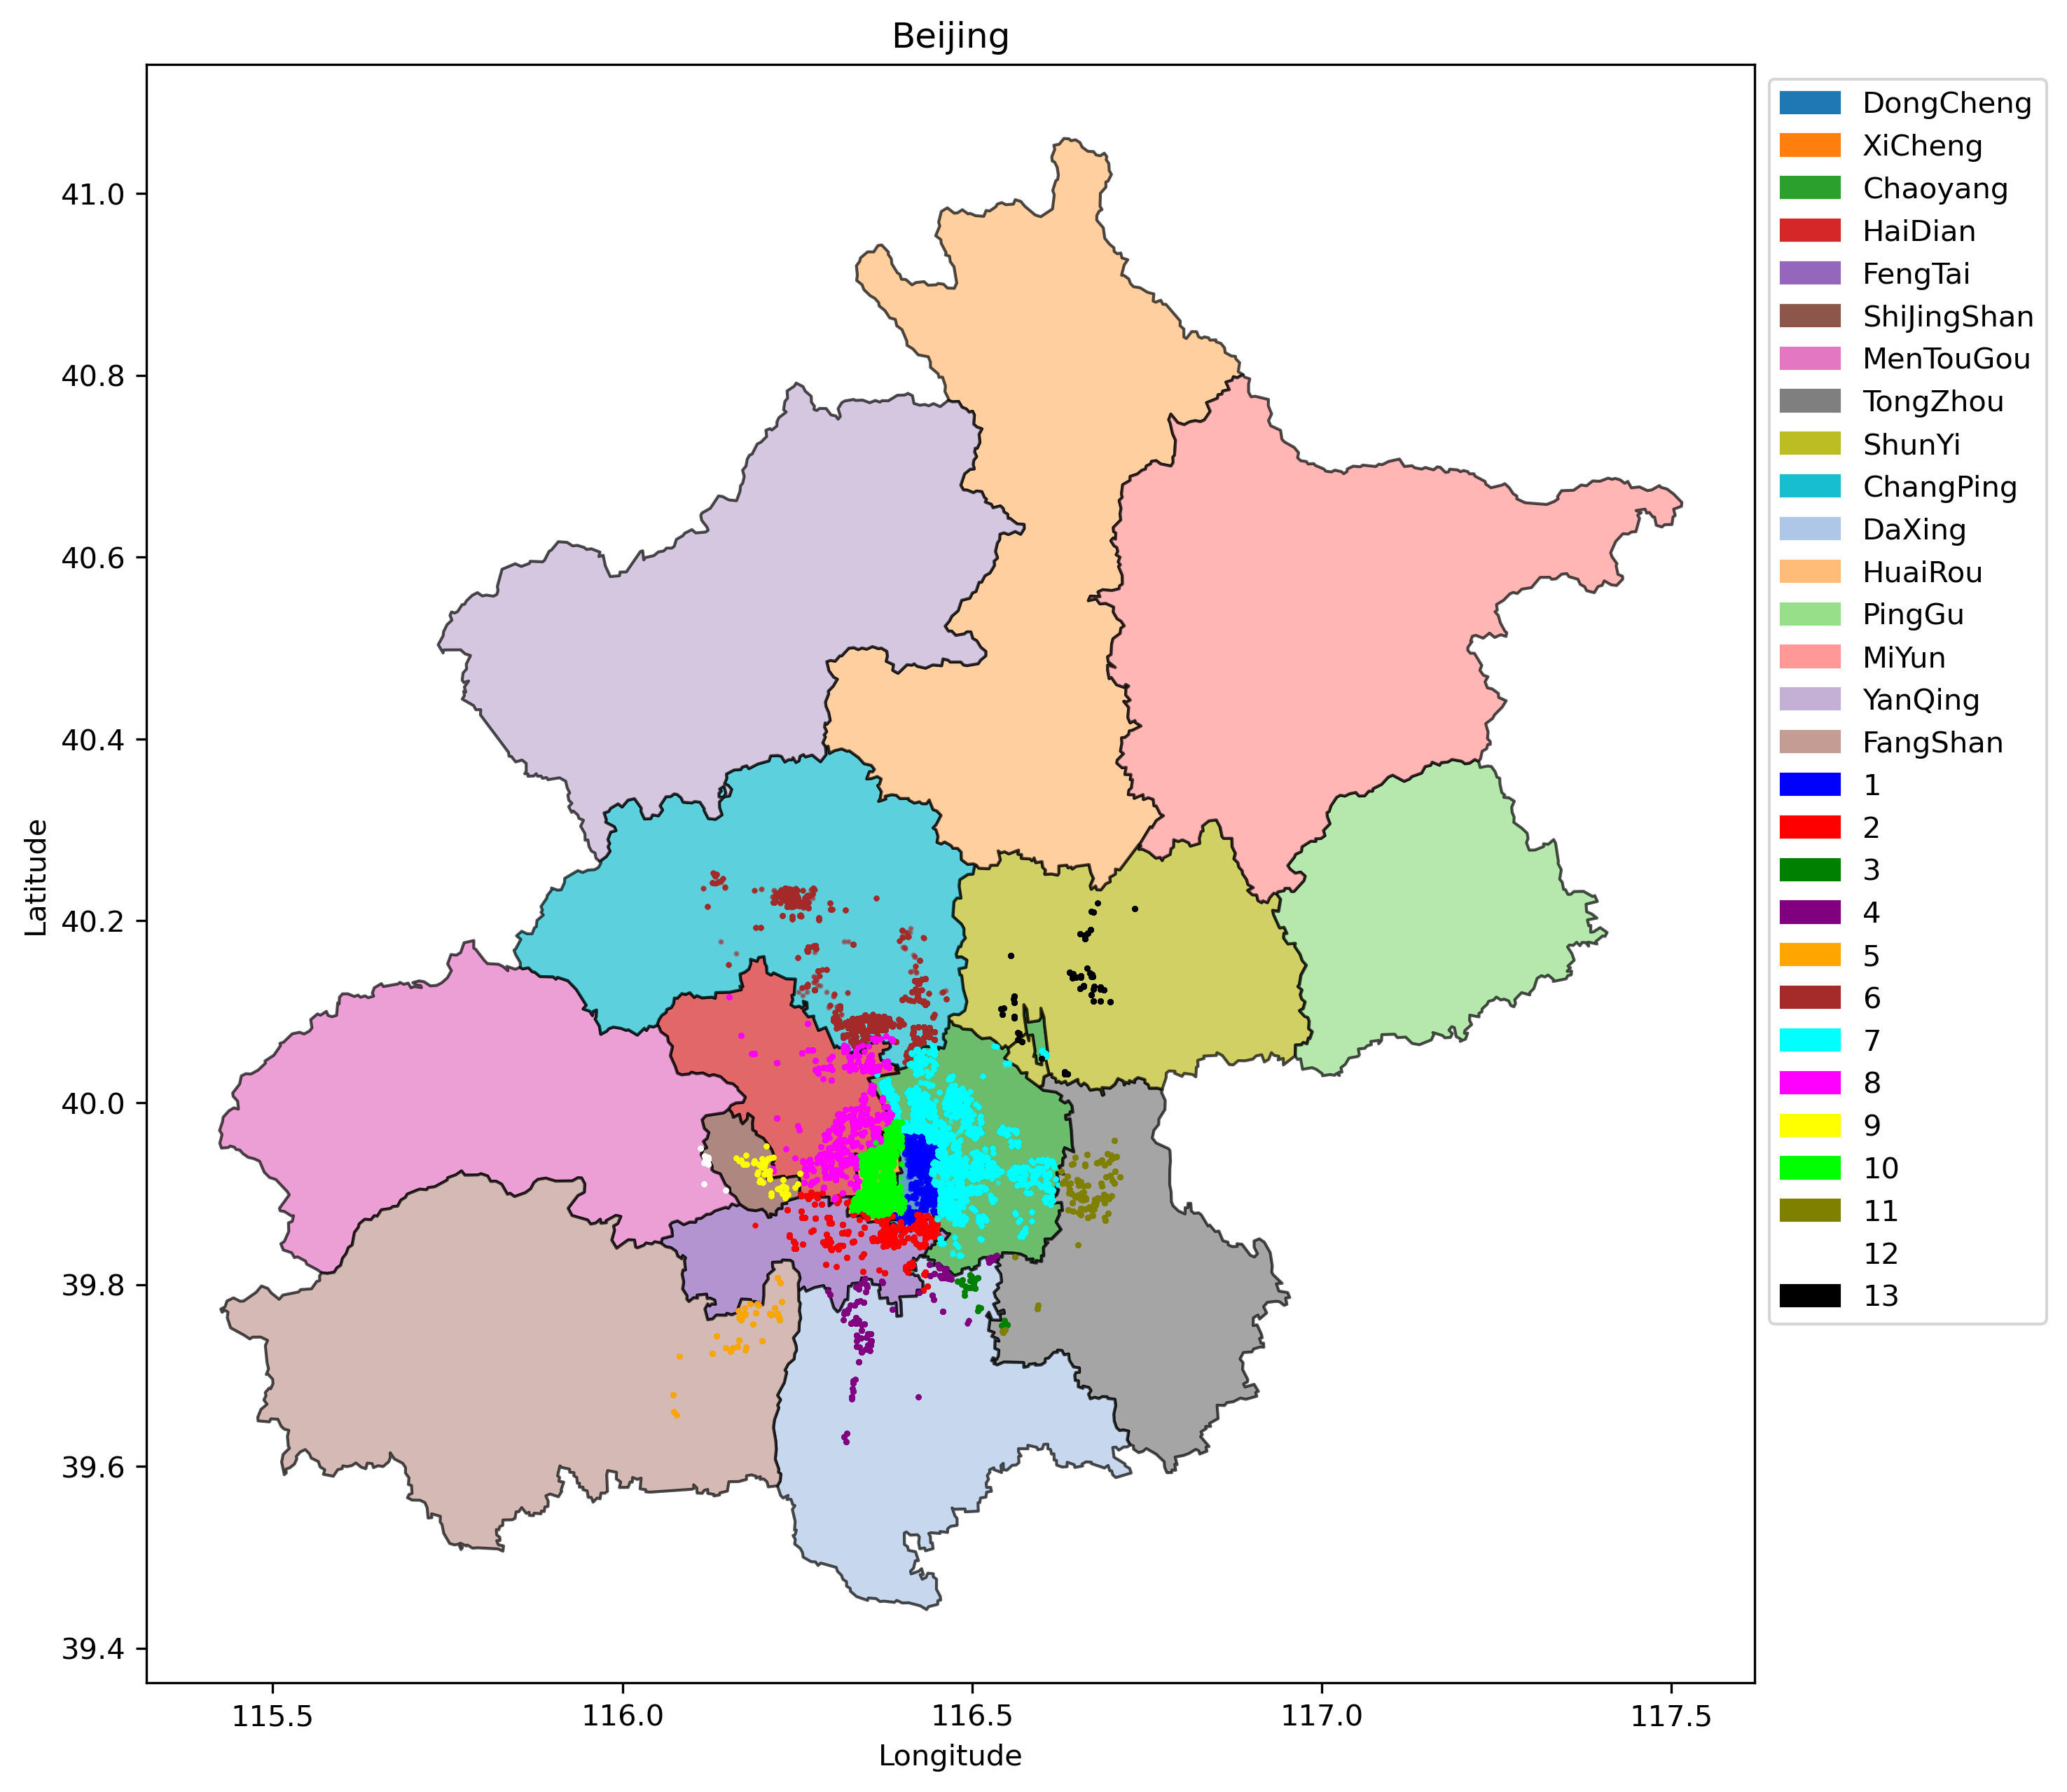

In [ ]:
# Define mapping of district names to Matplotlib color codes
region_colors = {
    "东城区": "#1f77b4",
    "西城区": "#ff7f0e",
    "朝阳区": "#2ca02c",
    "海淀区": "#d62728",
    "丰台区": "#9467bd",
    "石景山区": "#8c564b",
    "门头沟区": "#e377c2",
    "通州区": "#7f7f7f",
    "顺义区": "#bcbd22",
    "昌平区": "#17becf",
    "大兴区": "#aec7e8",
    "怀柔区": "#ffbb78",
    "平谷区": "#98df8a",
    "密云区": "#ff9896",
    "延庆区": "#c5b0d5",
    "房山区": "#c49c94"
}


# Create a figure and axis object and set the resolution
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)

# Iterate through each area and set the color
for region_name, color in region_colors.items():
    region_data = gdf[gdf['name'] == region_name]  # filter data by name
    region_data.plot(ax=ax, color=color, label=region_name, edgecolor='k', linewidth=1, alpha=0.7)

# Define the color of dark points for each district
district_colors = {
    1: "blue",
    2: "red",
    3: "green",
    4: "purple",
    5: "orange",
    6: "brown",
    7: "cyan",
    8: "magenta",
    9: "yellow",
    10: "lime",
    11: "olive",
    12: "white",
    13: "black"
}

# Go through each district and set a dark point
for district, group in df.groupby('district'):
    color = district_colors.get(district, "gray")  # Get the color of the corresponding district, if not, use gray
    ax.scatter(group['Lng'], group['Lat'], color=color, label=f"District {district}", s=0.8, alpha=0.55)

legend_handles = [
    Patch(color="#1f77b4", label="DongCheng"), Patch(color="#ff7f0e", label="XiCheng"),
    Patch(color="#2ca02c", label="Chaoyang"), Patch(color="#d62728", label="HaiDian"),
    Patch(color="#9467bd", label="FengTai"), Patch(color="#8c564b", label="ShiJingShan"),
    Patch(color="#e377c2", label="MenTouGou"), Patch(color="#7f7f7f", label="TongZhou"),
    Patch(color="#bcbd22", label="ShunYi"), Patch(color="#17becf", label="ChangPing"),
    Patch(color="#aec7e8", label="DaXing"), Patch(color="#ffbb78", label="HuaiRou"),
    Patch(color="#98df8a", label="PingGu"), Patch(color="#ff9896", label="MiYun"),
    Patch(color="#c5b0d5", label="YanQing"), Patch(color="#c49c94", label="FangShan"),
    Patch(color="blue", label="1"), Patch(color="red", label="2"),
    Patch(color="green", label="3"), Patch(color="purple", label="4"),
    Patch(color="orange", label="5"), Patch(color="brown", label="6"),
    Patch(color="cyan", label="7"), Patch(color="magenta", label="8"),
    Patch(color="yellow", label="9"), Patch(color="lime", label="10"),
    Patch(color="olive", label="11"), Patch(color="white", label="12"),
    Patch(color="black", label="13")
]

# add legend
ax.legend(handles = legend_handles, loc='upper left', bbox_to_anchor=(1, 1))

# Set graph title and axis labels
ax.set_title("Beijing")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# show graph
plt.savefig("beijing_map.png")
plt.show()

#### According to the above plot, the Daxing district contains points of two colors, so the district data (original data) may be inaccurate. Therefore, the real_district is created according to the real longitude and latitude.

In [ ]:
# According to the above plot, create a dictionary mapping numeric district codes to English district names
district_mapping = {
    1: "DongCheng",
    2: "FengTai",
    3: "DaXing",
    4: "DaXing",
    5: "FangShan",
    6: "ChangPing",
    7: "ChaoYang",
    8: "HaiDian",
    9: "ShiJingShan",
    10: "XiCheng",
    11: "TongZhou",
    12: "ShiJingShan",
    13: "ShunYi"
}

# Use the replace method to replace the numeric district code in the "district" column with the English district name
df['district'] = df['district'].replace(district_mapping)

In [ ]:
# Create a GeoDataFrame to store these point data
geometry = gpd.points_from_xy(df['Lng'], df['Lat'])
points_gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Use the sjoin function to spatially join point data with geographic data
result = gpd.sjoin(points_gdf, gdf, how="left", op="within")

# The "name" column in result will contain the name of the region in which each observation is located
print(result[['Lng', 'Lat', 'name']])

/Users/wyb/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3400: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/wv/s28dqvls6z39t582smtps8800000gn/T/ipykernel_99345/2166308944.py:6: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  result = gpd.sjoin(points_gdf, gdf, how="left", op="within")


               Lng        Lat name
0       116.475489  40.019520  朝阳区
1       116.453917  39.881534  朝阳区
2       116.561978  39.877145  朝阳区
3       116.438010  40.076114  昌平区
4       116.428392  39.886229  东城区
...            ...        ...  ...
318846  116.546899  39.755236  通州区
318847  116.497474  39.810115  大兴区
318848  116.497256  39.804081  大兴区
318849  116.501794  39.799347  大兴区
318850  116.497474  39.810115  大兴区

[318851 rows x 3 columns]


In [ ]:
# Create a GeoDataFrame to store these point data
geometry = gpd.points_from_xy(df['Lng'], df['Lat'])
points_gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Use the sjoin function to spatially join point data with geographic data
df1 = gpd.sjoin(points_gdf, gdf, how="left", op="within")

# Create a dictionary that maps Chinese region names to English region names
region_name_mapping = {
    "东城区": "DongCheng",
    "西城区": "XiCheng",
    "朝阳区": "ChaoYang",
    "海淀区": "HaiDian",
    "丰台区": "FengTai",
    "石景山区": "ShiJingShan",
    "门头沟区": "MenTouGou",
    "通州区": "TongZhou",
    "顺义区": "ShunYi",
    "昌平区": "ChangPing",
    "大兴区": "DaXing",
    "怀柔区": "HuaiRou",
    "平谷区": "PingGu",
    "密云区": "MiYun",
    "延庆区": "YanQing",
    "房山区": "FangShan"
}

# Replace the Chinese district name in the "name" column with the English name
df1['name'] = df1['name'].map(region_name_mapping)

/Users/wyb/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3400: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/wv/s28dqvls6z39t582smtps8800000gn/T/ipykernel_99345/1077512884.py:6: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  df1 = gpd.sjoin(points_gdf, gdf, how="left", op="within")


In [ ]:
# check the data
df1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 318851 entries, 0 to 318850
Data columns (total 34 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   url                  318851 non-null  object  
 1   id                   318851 non-null  object  
 2   Lng                  318851 non-null  float64 
 3   Lat                  318851 non-null  float64 
 4   Cid                  318851 non-null  int64   
 5   tradeTime            318851 non-null  object  
 6   DOM                  160874 non-null  float64 
 7   followers            318851 non-null  int64   
 8   totalPrice           318851 non-null  float64 
 9   price                318851 non-null  int64   
 10  square               318851 non-null  float64 
 11  livingRoom           318851 non-null  object  
 12  drawingRoom          318851 non-null  object  
 13  kitchen              318851 non-null  int64   
 14  bathRoom             318851 non-null  object

In [ ]:
# real district for observations
df1['name']
name_counts = df1['name'].value_counts()
print(name_counts)

ChaoYang       118430
ChangPing       40288
HaiDian         35827
XiCheng         31095
FengTai         23558
DaXing          17074
TongZhou        14212
DongCheng       13458
ShiJingShan     11689
ShunYi           9508
FangShan         2955
MenTouGou         757
Name: name, dtype: int64


In [ ]:
# original datatset for different district
df1['district']
district_counts = df1['district'].value_counts()
print(district_counts)

ChaoYang       107244
ChangPing       38634
HaiDian         38200
XiCheng         31293
FengTai         29338
DaXing          17850
DongCheng       17086
TongZhou        13974
ShiJingShan     13075
ShunYi           9202
FangShan         2955
Name: district, dtype: int64


### Differences between District codes and actual administrative division

In [ ]:
# Compare identical values in two columns
common_values = df1[df1['name'] == df1['district']]

# Compare different values in two columns
different_values = df1[df1['name'] != df1['district']]

# Get the number of identical and different values
common_count = len(common_values)
different_count = len(different_values)

name_counts = df1['name'].value_counts()
district_counts = df1['district'].value_counts()

# Count the number of identical regions in two tables
common_counts = name_counts.index.intersection(district_counts.index)


# Create a dataframe to store the results
result_df = pd.DataFrame(columns=['District', 'Error Ratio'])

# Calculate the error ratio and add the results to a data frame
for district in common_counts:
    name_count = name_counts[district]
    district_count = district_counts[district]
    difference = name_count - district_count
    difference_ratio = abs(difference) / name_count
    result_df = result_df.append({'District': district, 'Error Ratio': difference_ratio}, ignore_index=True)

# Sort the resulting data frame in ascending order
result_df = result_df.sort_values(by='Error Ratio', ascending=False)

# Calculate the overall difference ratio
total_difference_ratio = different_count / (different_count + common_count)

# Add the overall error ratio value to the results data frame
result_df = result_df.append({'District': 'Whole data set difference', 'Error Ratio': total_difference_ratio}, ignore_index=True)


# Format the "Error Ratio" column as a percent sign, retaining two decimal places.
result_df['Error Ratio'] = result_df['Error Ratio'].apply(lambda x: f'{x:.2%}' if not pd.isna(x) else 'N/A')

# show results
print("Error Ratio:")
print(tabulate(result_df, headers='keys', tablefmt='grid', showindex=False))

# download the excel
result_df.to_excel('Error Ratio.xlsx', index=False)


/var/folders/wv/s28dqvls6z39t582smtps8800000gn/T/ipykernel_99345/1510055591.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'District': district, 'Error Ratio': difference_ratio}, ignore_index=True)
/var/folders/wv/s28dqvls6z39t582smtps8800000gn/T/ipykernel_99345/1510055591.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'District': district, 'Error Ratio': difference_ratio}, ignore_index=True)
/var/folders/wv/s28dqvls6z39t582smtps8800000gn/T/ipykernel_99345/1510055591.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'District': district, 'Error Ratio': difference_ratio}, ignore_index=True)
/var/folders/wv/s28dqvls6z39t58

Error Ratio:
+---------------------------+---------------+
| District                  | Error Ratio   |
+===========================+===============+
| DongCheng                 | 26.96%        |
+---------------------------+---------------+
| FengTai                   | 24.54%        |
+---------------------------+---------------+
| ShiJingShan               | 11.86%        |
+---------------------------+---------------+
| ChaoYang                  | 9.45%         |
+---------------------------+---------------+
| HaiDian                   | 6.62%         |
+---------------------------+---------------+
| DaXing                    | 4.54%         |
+---------------------------+---------------+
| ChangPing                 | 4.11%         |
+---------------------------+---------------+
| ShunYi                    | 3.22%         |
+---------------------------+---------------+
| TongZhou                  | 1.67%         |
+---------------------------+---------------+
| XiCheng            

In [ ]:
df1.rename(columns={'name': 'real_district'}, inplace=True)

In [ ]:
# check the data
df1['real_district']

0          ChaoYang
1          ChaoYang
2          ChaoYang
3         ChangPing
4         DongCheng
            ...    
318846     TongZhou
318847       DaXing
318848       DaXing
318849       DaXing
318850       DaXing
Name: real_district, Length: 318851, dtype: object

In [ ]:
columns_to_drop = ['geometry','index_right','adcode','childrenNum', 'level',
                   'parent', 'subFeatureIndex','district']
df1 = df1.drop(columns=columns_to_drop)

### 3.2 Data Splitting
### 3.2.1 Extract data from the floor variable and name it Max_floor

In [ ]:
df1['Max_floor'] = df1['floor'].str.extract(r'(\d+)')

print(df1['Max_floor'])

0         26
1         22
2          4
3         21
4          6
          ..
318846     5
318847    24
318848     7
318849     5
318850    17
Name: Max_floor, Length: 318851, dtype: object


### 3.3 Omitted Variables
### 3.3.1 constructionTime
#### Delete the NA in the constructionTime

In [ ]:
df1['constructionTime'].value_counts()
df1 = df1[~df1['constructionTime'].isin(['未知'])]
print(df1['constructionTime'])

0         2005
1         2004
2         2005
3         2008
4         1960
          ... 
318845    2009
318846    2003
318847    2009
318848    2000
318849    2003
Name: constructionTime, Length: 299568, dtype: object


In [ ]:
# check the missing values for each variable
df.isnull().sum(axis=0)

url                         0
id                          0
Lng                         0
Lat                         0
Cid                         0
tradeTime                   0
DOM                    157977
followers                   0
totalPrice                  0
price                       0
square                      0
livingRoom                  0
drawingRoom                 0
kitchen                     0
bathRoom                    0
floor                       0
buildingType             2021
constructionTime            0
renovationCondition         0
buildingStructure           0
ladderRatio                 0
elevator                   32
fiveYearsProperty          32
subway                     32
district                    0
communityAverage          463
dtype: int64

### 3.3.2 Replace missing values with median (DOM & communityAverage )

In [ ]:
df1['DOM'].fillna(df1['DOM'].median(), inplace = True)
df1['DOM'] = df1['DOM'].replace('nan', np.nan)
median_DOM = df1['DOM'].median()
df1['DOM'].fillna(median_DOM, inplace=True)

df1['communityAverage'].fillna(df1['communityAverage'].median(), inplace=True)
df1['communityAverage'] = df1['communityAverage'].replace('nan', np.nan)
median_communityAverage = df1['communityAverage'].median()
df1['communityAverage'].fillna(median_communityAverage, inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299568 entries, 0 to 318849
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   url                  299568 non-null  object 
 1   id                   299568 non-null  object 
 2   Lng                  299568 non-null  float64
 3   Lat                  299568 non-null  float64
 4   Cid                  299568 non-null  int64  
 5   tradeTime            299568 non-null  object 
 6   DOM                  299568 non-null  float64
 7   followers            299568 non-null  int64  
 8   totalPrice           299568 non-null  float64
 9   price                299568 non-null  int64  
 10  square               299568 non-null  float64
 11  livingRoom           299568 non-null  object 
 12  drawingRoom          299568 non-null  object 
 13  kitchen              299568 non-null  int64  
 14  bathRoom             299568 non-null  object 
 15  floor            

### 3.3.2 Delete missing values (buildingType, elevator, fiveYearsProperty, subway, Max_floor)

In [ ]:
# buildingType
df1.dropna(subset=['buildingType'], inplace=True)
df1['buildingType'].value_counts()
df1 = df1[~df1['buildingType'].isin(['nan'])]
df1 = df1[~df1['buildingType'].isin(['NaN'])]

# elevator
df1.dropna(subset=['elevator'], inplace=True)
df1['elevator'].value_counts()
df1 = df1[~df1['elevator'].isin(['nan'])]
df1 = df1[~df1['elevator'].isin(['NaN'])]

# fiveYearsProperty
df1.dropna(subset=['fiveYearsProperty'], inplace=True)
df1['fiveYearsProperty'].value_counts()
df1 = df1[~df1['fiveYearsProperty'].isin(['nan'])]
df1 = df1[~df1['fiveYearsProperty'].isin(['NaN'])]

# subway
df1.dropna(subset=['subway'], inplace=True)
df1['subway'].value_counts()
df1 = df1[~df1['subway'].isin(['nan'])]
df1 = df1[~df1['subway'].isin(['NaN'])]

# Max_floor
df1.dropna(subset=['Max_floor'], inplace=True)
df1['Max_floor'].value_counts()
df1 = df1[~df1['Max_floor'].isin(['nan'])]
df1 = df1[~df1['Max_floor'].isin(['NaN'])]

# constructionTime
df1['constructionTime'].value_counts()
df1 = df1[~df1['constructionTime'].isin(['nan'])]
df1 = df1[~df1['constructionTime'].isin(['NaN'])]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297990 entries, 0 to 318849
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   url                  297990 non-null  object 
 1   id                   297990 non-null  object 
 2   Lng                  297990 non-null  float64
 3   Lat                  297990 non-null  float64
 4   Cid                  297990 non-null  int64  
 5   tradeTime            297990 non-null  object 
 6   DOM                  297990 non-null  float64
 7   followers            297990 non-null  int64  
 8   totalPrice           297990 non-null  float64
 9   price                297990 non-null  int64  
 10  square               297990 non-null  float64
 11  livingRoom           297990 non-null  object 
 12  drawingRoom          297990 non-null  object 
 13  kitchen              297990 non-null  int64  
 14  bathRoom             297990 non-null  object 
 15  floor            

### 3.4 Outliers

### 3.4.1 Filter the valid tradeTime (filter the year between 2011 and 2017)

In [ ]:
# filter the valid tradeTime
df1['tradeTime'] = pd.to_datetime(df1['tradeTime'], format='%Y-%m-%d')
df1 = df1[(df1['tradeTime'].dt.year >= 2011) & (df1['tradeTime'].dt.year <= 2017)]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297589 entries, 0 to 318849
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   url                  297589 non-null  object        
 1   id                   297589 non-null  object        
 2   Lng                  297589 non-null  float64       
 3   Lat                  297589 non-null  float64       
 4   Cid                  297589 non-null  int64         
 5   tradeTime            297589 non-null  datetime64[ns]
 6   DOM                  297589 non-null  float64       
 7   followers            297589 non-null  int64         
 8   totalPrice           297589 non-null  float64       
 9   price                297589 non-null  int64         
 10  square               297589 non-null  float64       
 11  livingRoom           297589 non-null  object        
 12  drawingRoom          297589 non-null  object        
 13  kitchen       

### 3.4.2 Handling outliers in 'price'

In [ ]:
# Group the filtered data frame by year
df_grouped = df1.groupby(df1['tradeTime'].dt.year)

# Calculate data frequency per year (number of rows per year)
yearly_frequency = df_grouped.size()

# Print annual data frequency
print(yearly_frequency)

tradeTime
2011     5590
2012    34476
2013    35583
2014    30117
2015    64371
2016    85415
2017    42037
dtype: int64


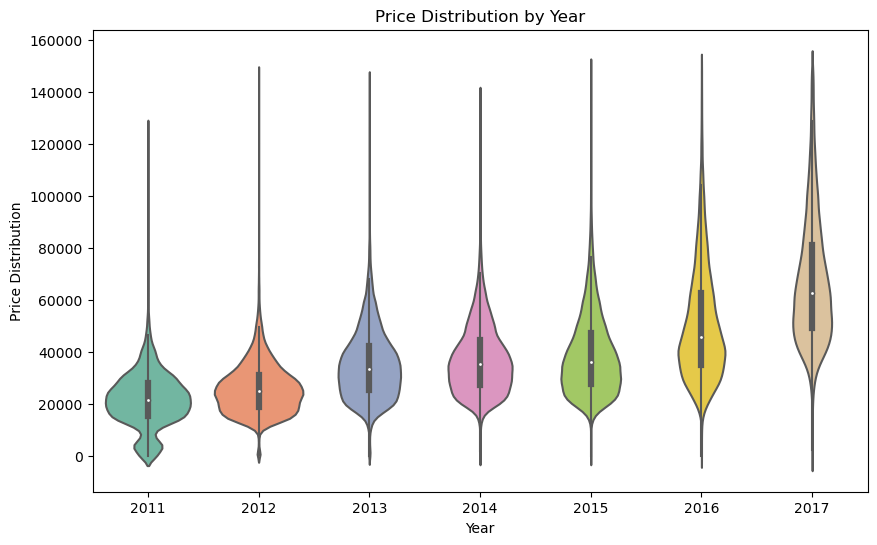

In [ ]:
# Add violin plot of year distribution
plt.figure(figsize=(10, 6))
sns.violinplot(data=df1, x=df1['tradeTime'].dt.year, y='price', palette='Set2')
plt.xlabel('Year')
plt.ylabel('Price Distribution')
plt.title('Price Distribution by Year')

# show plot
plt.show()

#### Calculate the threshold of outlier of price

In [ ]:
# filter data with 'tradeTime' = 2011
df_2011 = df1[df1['tradeTime'].dt.year == 2011]

# Calculate the standard deviation and mean of the 'price' column
sigma_2011 = df_2011['price'].std()
mean_2011 = df_2011['price'].mean()

lower_bound = mean_2011-1*sigma_2011
print(lower_bound)

11358.694655239433


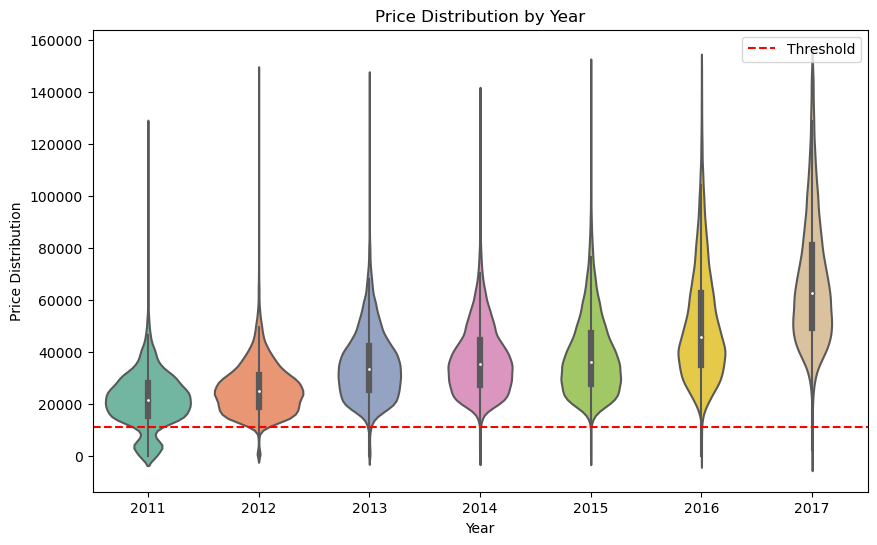

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df1, x=df1['tradeTime'].dt.year, y='price', palette='Set2')
plt.xlabel('Year')
plt.ylabel('Price Distribution')
plt.title('Price Distribution by Year')

# Add a red dotted line at price=11365.467772613729
plt.axhline(y=lower_bound, color='red', linestyle='--', label='Threshold')
plt.legend()

# show plot
plt.savefig("Price_Distribution_by_Year.png")
plt.show()

In [ ]:
# delete the outliers
df1 = df1[(df1['price'] >= lower_bound)]

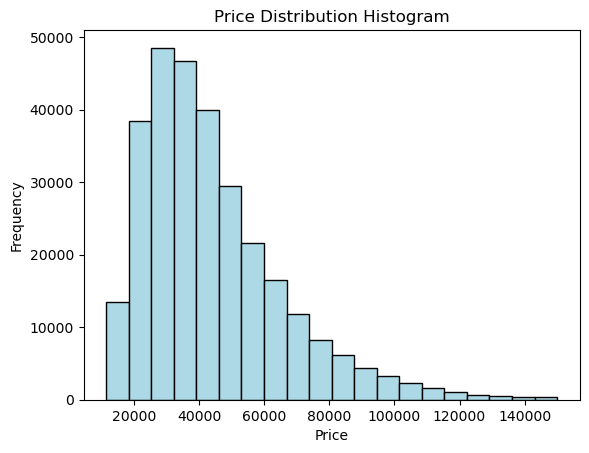

In [ ]:
price_data = df1['price']

# create histogram
plt.hist(price_data, bins=20, color='lightblue', edgecolor='black')

# add legend and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution Histogram')

# show plot
plt.show()

In [ ]:
# check the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295760 entries, 0 to 318849
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   url                  295760 non-null  object        
 1   id                   295760 non-null  object        
 2   Lng                  295760 non-null  float64       
 3   Lat                  295760 non-null  float64       
 4   Cid                  295760 non-null  int64         
 5   tradeTime            295760 non-null  datetime64[ns]
 6   DOM                  295760 non-null  float64       
 7   followers            295760 non-null  int64         
 8   totalPrice           295760 non-null  float64       
 9   price                295760 non-null  int64         
 10  square               295760 non-null  float64       
 11  livingRoom           295760 non-null  object        
 12  drawingRoom          295760 non-null  object        
 13  kitchen       

### 3.5 Data Type Conversation
### Adjust other data types to numeric

In [ ]:
df1['livingRoom'] = df1['livingRoom'].str.strip()
df1['livingRoom'] = pd.to_numeric(df1['livingRoom'], errors='coerce')
df1['drawingRoom'] = pd.to_numeric(df1['drawingRoom'])
df1['bathRoom'] = pd.to_numeric(df1['bathRoom'])
df1['constructionTime'] = pd.to_numeric(df1['constructionTime'])
df1['Max_floor'] = pd.to_numeric(df1['Max_floor'])

/var/folders/wv/s28dqvls6z39t582smtps8800000gn/T/ipykernel_99345/1688256028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['livingRoom'] = df1['livingRoom'].str.strip()
/var/folders/wv/s28dqvls6z39t582smtps8800000gn/T/ipykernel_99345/1688256028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['livingRoom'] = pd.to_numeric(df1['livingRoom'], errors='coerce')
/var/folders/wv/s28dqvls6z39t582smtps8800000gn/T/ipykernel_99345/1688256028.py:3: SettingWithCopyWarning: 
A value is trying to be set o

### 3.6 Check the cleaned data

In [ ]:
# check the cleaned data
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295760 entries, 0 to 318849
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   url                  295760 non-null  object        
 1   id                   295760 non-null  object        
 2   Lng                  295760 non-null  float64       
 3   Lat                  295760 non-null  float64       
 4   Cid                  295760 non-null  int64         
 5   tradeTime            295760 non-null  datetime64[ns]
 6   DOM                  295760 non-null  float64       
 7   followers            295760 non-null  int64         
 8   totalPrice           295760 non-null  float64       
 9   price                295760 non-null  int64         
 10  square               295760 non-null  float64       
 11  livingRoom           295760 non-null  int64         
 12  drawingRoom          295760 non-null  int64         
 13  kitchen       

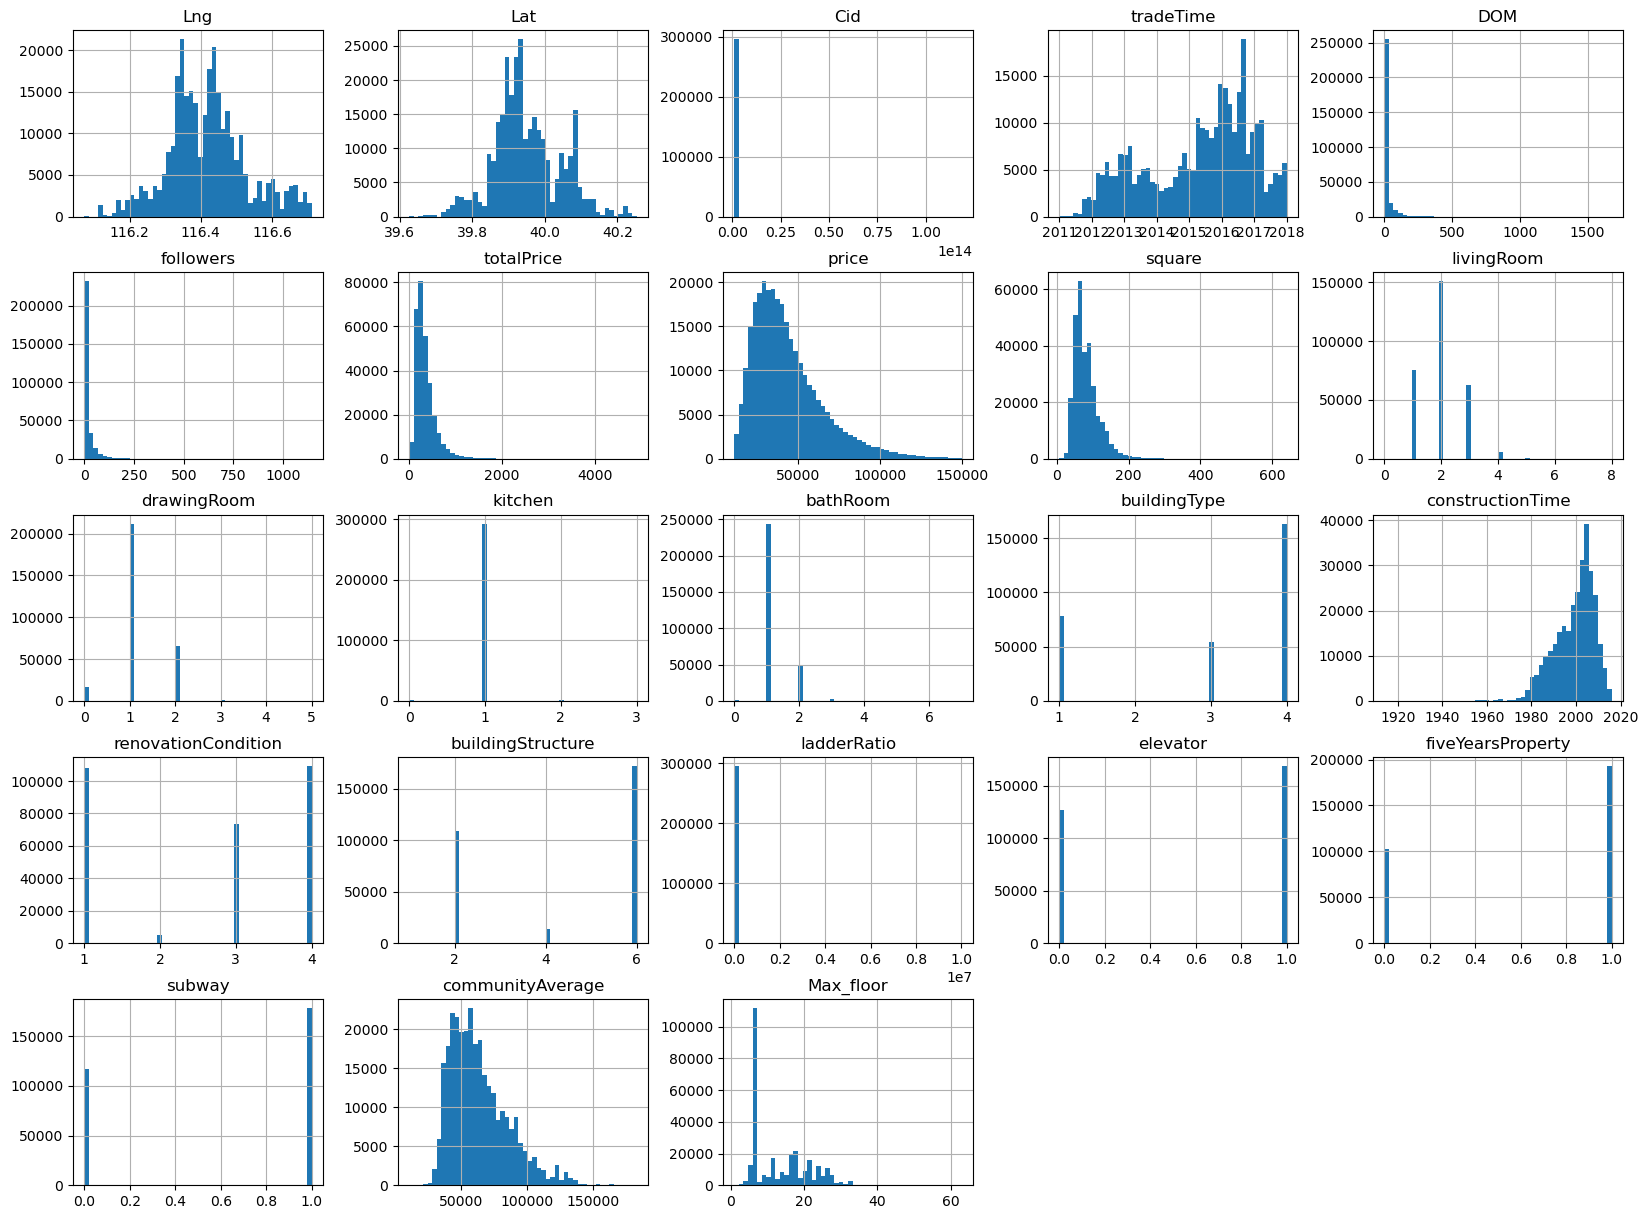

In [ ]:
df1.hist(bins=50, figsize=(20,15))
plt.show()

## 4.0 Model specification and estimation
### 4.1 Data Analysis
### 4.1.1 Research the number and proportion of rooms in Beijing

1    244155
2     48152
3      2494
0       612
4       306
5        36
6         4
7         1
Name: bathRoom, dtype: int64


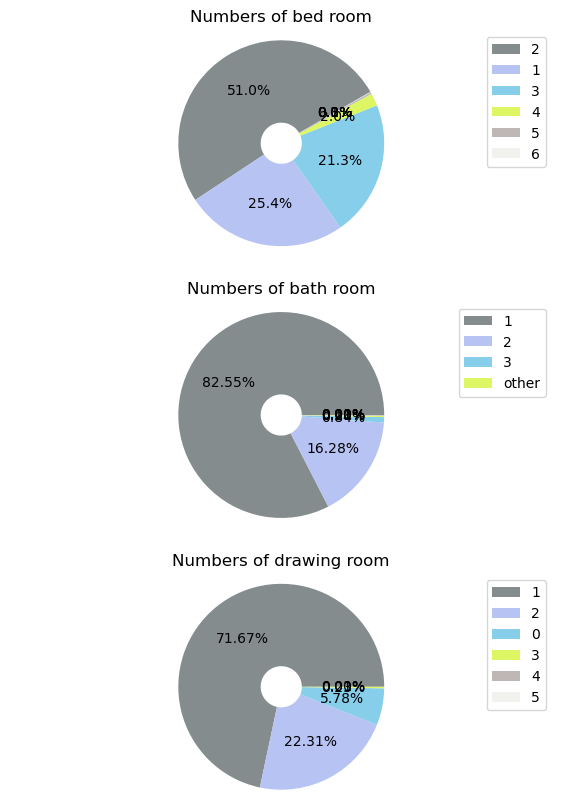

In [ ]:
fig, (ax1,ax2,ax3)= plt.subplots(3,1,figsize=(7,10))
colors = ['#848C8E', '#B7C3F3', 'skyblue','#DCF763', '#BFB7B6','#F1F2EE']
x = df1.livingRoom.value_counts(sort=True)
ax1.set_title('Numbers of bed room')
ax1.pie(x.values,colors=colors,startangle=30,
           wedgeprops=dict(width=.8),autopct='%1.1f%%')# For donuts)#explode=explode
ax1.legend(labels=x.index[:6],loc="best")
ax1.axis('equal')

x = df1.bathRoom.value_counts(sort=True)
#x = x.iloc[:3]
labels=list(x.iloc[:3].index)
labels.append("other")
ax2.set_title('Numbers of bath room')
ax2.pie(x.values,colors=colors,wedgeprops=dict(width=.8),autopct='%1.2f%%')# For donuts)#explode=explode
ax2.legend(labels=labels,loc='best')
ax2.axis('equal')
print(x)

x = df1.drawingRoom.value_counts(sort=True)
ax3.set_title('Numbers of drawing room')
ax3.pie(df1.drawingRoom.value_counts(sort=True).values,colors=colors,wedgeprops=dict(width=.8),autopct='%1.2f%%')# For donuts)#explode=explode
ax3.legend(labels=df1.drawingRoom.value_counts(sort=True).index,loc="best")
ax3.axis('equal')

plt.savefig("number_rooms.png")
plt.show()

#### According to the above plot, we study the room type with two bedrooms, one living room and one bathroom.

In [ ]:
Beijing_filtered_df = df1[(df1['livingRoom'] == 2) &
                (df1['drawingRoom'] == 1) &
                (df1['bathRoom'] == 1)]

In [ ]:
Beijing_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115704 entries, 0 to 318832
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   url                  115704 non-null  object        
 1   id                   115704 non-null  object        
 2   Lng                  115704 non-null  float64       
 3   Lat                  115704 non-null  float64       
 4   Cid                  115704 non-null  int64         
 5   tradeTime            115704 non-null  datetime64[ns]
 6   DOM                  115704 non-null  float64       
 7   followers            115704 non-null  int64         
 8   totalPrice           115704 non-null  float64       
 9   price                115704 non-null  int64         
 10  square               115704 non-null  float64       
 11  livingRoom           115704 non-null  int64         
 12  drawingRoom          115704 non-null  int64         
 13  kitchen       

### 4.1.2 House price trends by year

/var/folders/wv/s28dqvls6z39t582smtps8800000gn/T/ipykernel_99345/2814692334.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Beijing_filtered_df['tradeTime_year'] = Beijing_filtered_df['tradeTime'].dt.year


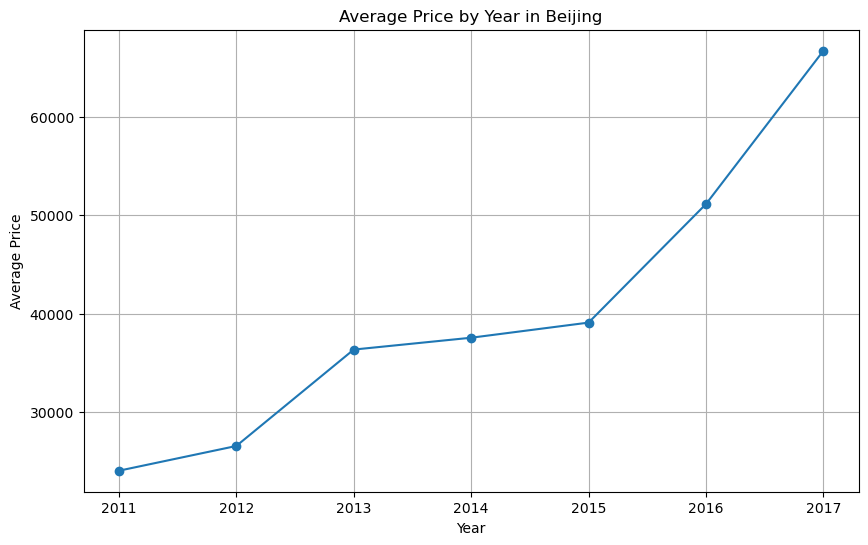

In [ ]:
# Extract data based on year and calculate the average price of each year
Beijing_filtered_df['tradeTime_year'] = Beijing_filtered_df['tradeTime'].dt.year
yearly_price_avg = Beijing_filtered_df.groupby('tradeTime_year')['price'].mean()

# create line graph
plt.figure(figsize=(10, 6))
plt.plot(yearly_price_avg.index, yearly_price_avg.values, marker='o', linestyle='-')

# Set graph title and axis labels
plt.title("Average Price by Year in Beijing")
plt.xlabel("Year")
plt.ylabel("Average Price")

# show plot
plt.grid(True)
plt.savefig("houseprice_trend.png")
plt.show()

### 4.1.3 Filter the data we need

#### According to the figure above, it is found that the average price per square meter did not change significantly from 2013 to 2015. Therefore, this study will be based on data from 2013 to 2015.

In [ ]:
Beijing_filtered_df = Beijing_filtered_df[(Beijing_filtered_df['tradeTime'].dt.year >= 2013)
                                          & (Beijing_filtered_df['tradeTime'].dt.year <= 2015)]

In [ ]:
Beijing_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50380 entries, 92606 to 318429
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   url                  50380 non-null  object        
 1   id                   50380 non-null  object        
 2   Lng                  50380 non-null  float64       
 3   Lat                  50380 non-null  float64       
 4   Cid                  50380 non-null  int64         
 5   tradeTime            50380 non-null  datetime64[ns]
 6   DOM                  50380 non-null  float64       
 7   followers            50380 non-null  int64         
 8   totalPrice           50380 non-null  float64       
 9   price                50380 non-null  int64         
 10  square               50380 non-null  float64       
 11  livingRoom           50380 non-null  int64         
 12  drawingRoom          50380 non-null  int64         
 13  kitchen              50380

#### The topic of this analysis  is the impact of medium rise (max_floor = 7,8,9) and high rise (max_floor >= 10) on housing prices. Based on this, the data were screened.

In [ ]:
Beijing_filtered_df = Beijing_filtered_df[(Beijing_filtered_df['Max_floor'] == 7) |
                                           (Beijing_filtered_df['Max_floor'] == 8) |
                                           (Beijing_filtered_df['Max_floor'] == 9) |
                                           (Beijing_filtered_df['Max_floor'] >= 10)]

In [ ]:
Beijing_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23842 entries, 92612 to 318386
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   url                  23842 non-null  object        
 1   id                   23842 non-null  object        
 2   Lng                  23842 non-null  float64       
 3   Lat                  23842 non-null  float64       
 4   Cid                  23842 non-null  int64         
 5   tradeTime            23842 non-null  datetime64[ns]
 6   DOM                  23842 non-null  float64       
 7   followers            23842 non-null  int64         
 8   totalPrice           23842 non-null  float64       
 9   price                23842 non-null  int64         
 10  square               23842 non-null  float64       
 11  livingRoom           23842 non-null  int64         
 12  drawingRoom          23842 non-null  int64         
 13  kitchen              23842

### 4.2 Create new variable and dummy variables

### 4.2.1 Create a new variable (house_age)
#### house_age = 2023 - constructionTime

In [ ]:
current_year = Beijing_filtered_df['tradeTime_year']

# compute the house age
Beijing_filtered_df['house_age'] = current_year - Beijing_filtered_df['constructionTime']

# delete the original variable
Beijing_filtered_df = Beijing_filtered_df.drop(columns=['constructionTime'])

In [ ]:
Beijing_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23842 entries, 92612 to 318386
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   url                  23842 non-null  object        
 1   id                   23842 non-null  object        
 2   Lng                  23842 non-null  float64       
 3   Lat                  23842 non-null  float64       
 4   Cid                  23842 non-null  int64         
 5   tradeTime            23842 non-null  datetime64[ns]
 6   DOM                  23842 non-null  float64       
 7   followers            23842 non-null  int64         
 8   totalPrice           23842 non-null  float64       
 9   price                23842 non-null  int64         
 10  square               23842 non-null  float64       
 11  livingRoom           23842 non-null  int64         
 12  drawingRoom          23842 non-null  int64         
 13  kitchen              23842

### 4.2.2 Max_floor_dummy
#### 1) Max_floor_dummy = 1: medium rise
#### 2)  Max_floor_dummy = 0: high rise

In [ ]:
Beijing_filtered_df['Max_floor'].value_counts()

18    3399
16    2675
24    1799
7     1573
12    1341
20    1313
14    1266
22    1086
21    1068
11     942
28     911
9      725
15     646
25     642
10     632
13     577
17     570
19     560
26     490
27     386
32     368
23     256
8      252
30     165
29     125
33      29
31      28
34      17
42       1
Name: Max_floor, dtype: int64

In [ ]:
# create dummy
condition1 = (Beijing_filtered_df['Max_floor'] >= 7) & (Beijing_filtered_df['Max_floor'] <= 9)
Beijing_filtered_df.loc[condition1, 'Max_floor_dummy'] = 1

condition2 = Beijing_filtered_df['Max_floor'] >= 10
Beijing_filtered_df.loc[condition2, 'Max_floor_dummy'] = 0

# delete the original max_floor
Beijing_filtered_df = Beijing_filtered_df.drop(columns=['Max_floor','floor'])

In [ ]:
Beijing_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23842 entries, 92612 to 318386
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   url                  23842 non-null  object        
 1   id                   23842 non-null  object        
 2   Lng                  23842 non-null  float64       
 3   Lat                  23842 non-null  float64       
 4   Cid                  23842 non-null  int64         
 5   tradeTime            23842 non-null  datetime64[ns]
 6   DOM                  23842 non-null  float64       
 7   followers            23842 non-null  int64         
 8   totalPrice           23842 non-null  float64       
 9   price                23842 non-null  int64         
 10  square               23842 non-null  float64       
 11  livingRoom           23842 non-null  int64         
 12  drawingRoom          23842 non-null  int64         
 13  kitchen              23842

In [ ]:
count_max_floor_dummy = Beijing_filtered_df['Max_floor_dummy'].value_counts()

# Output the number of 0s and 1s
print("number of 0:", count_max_floor_dummy[0]) # 10+
print("number of 1:", count_max_floor_dummy[1]) # 7-9

number of 0: 21292
number of 1: 2550


### 4.2.3 Create buildingType dummy variable
#### 1) buildingType = 1 (buildingType_tower) --- base variable
#### 2) buildingType = 3 (buildingType_plate_tower)
#### 3) buildingType = 4 (buildingType_plate)

In [ ]:
Beijing_filtered_df1 = Beijing_filtered_df.copy()

In [ ]:
building_type_counts = Beijing_filtered_df1['buildingType'].value_counts(dropna=False)
print(building_type_counts)

1.0    11864
3.0     6817
4.0     5161
Name: buildingType, dtype: int64


In [ ]:
encoder1 = OneHotEncoder(sparse_output=False, drop='first')
dummy_variables = pd.DataFrame(encoder1.fit_transform(Beijing_filtered_df1[['buildingType']]))
dummy_variables.columns = encoder1.get_feature_names_out()
# Reset index to ensure continuous row labels
dummy_variables = dummy_variables.reset_index(drop=True)
Beijing_filtered_df1 = Beijing_filtered_df1.reset_index(drop=True)
Beijing_filtered_df1 = pd.concat([Beijing_filtered_df1, dummy_variables], axis=1)

In [ ]:
Beijing_filtered_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23842 entries, 0 to 23841
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   url                  23842 non-null  object        
 1   id                   23842 non-null  object        
 2   Lng                  23842 non-null  float64       
 3   Lat                  23842 non-null  float64       
 4   Cid                  23842 non-null  int64         
 5   tradeTime            23842 non-null  datetime64[ns]
 6   DOM                  23842 non-null  float64       
 7   followers            23842 non-null  int64         
 8   totalPrice           23842 non-null  float64       
 9   price                23842 non-null  int64         
 10  square               23842 non-null  float64       
 11  livingRoom           23842 non-null  int64         
 12  drawingRoom          23842 non-null  int64         
 13  kitchen              23842 non-

In [ ]:
# rename the dummy variables
Beijing_filtered_df1.rename(columns={'buildingType_1.0': 'buildingType_tower', 'buildingType_3.0': 'buildingType_plate_tower', 'buildingType_4.0': 'buildingType_plate'}, inplace=True)

# Remove the original encoding column
Beijing_filtered_df1 = Beijing_filtered_df1.drop(columns=['buildingType'])

In [ ]:
Beijing_filtered_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23842 entries, 0 to 23841
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   url                       23842 non-null  object        
 1   id                        23842 non-null  object        
 2   Lng                       23842 non-null  float64       
 3   Lat                       23842 non-null  float64       
 4   Cid                       23842 non-null  int64         
 5   tradeTime                 23842 non-null  datetime64[ns]
 6   DOM                       23842 non-null  float64       
 7   followers                 23842 non-null  int64         
 8   totalPrice                23842 non-null  float64       
 9   price                     23842 non-null  int64         
 10  square                    23842 non-null  float64       
 11  livingRoom                23842 non-null  int64         
 12  drawingRoom       

### 4.2.4 Create renovationCondition dummy variable
#### 1) renovationCondition = 1 (renovation_other) --- base variable
#### 2) renovationCondition = 2 (renovation_rough)
#### 3) renovationCondition = 3 (renovation_Simplicity)
#### 4) renovationCondition = 4 (renovation_hardcover)

In [ ]:
building_type_counts = Beijing_filtered_df1['renovationCondition'].value_counts()
print(building_type_counts)

1    9101
4    8736
3    5613
2     392
Name: renovationCondition, dtype: int64


In [ ]:
encoder1 = OneHotEncoder(sparse_output=False, drop='first')
dummy_variables = pd.DataFrame(encoder1.fit_transform(Beijing_filtered_df1[['renovationCondition']]))
dummy_variables.columns = encoder1.get_feature_names_out()
# Reset index to ensure continuous row labels
dummy_variables = dummy_variables.reset_index(drop=True)
Beijing_filtered_df1 = Beijing_filtered_df1.reset_index(drop=True)
Beijing_filtered_df1 = pd.concat([Beijing_filtered_df1, dummy_variables], axis=1)

In [ ]:
Beijing_filtered_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23842 entries, 0 to 23841
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   url                       23842 non-null  object        
 1   id                        23842 non-null  object        
 2   Lng                       23842 non-null  float64       
 3   Lat                       23842 non-null  float64       
 4   Cid                       23842 non-null  int64         
 5   tradeTime                 23842 non-null  datetime64[ns]
 6   DOM                       23842 non-null  float64       
 7   followers                 23842 non-null  int64         
 8   totalPrice                23842 non-null  float64       
 9   price                     23842 non-null  int64         
 10  square                    23842 non-null  float64       
 11  livingRoom                23842 non-null  int64         
 12  drawingRoom       

In [ ]:
# rename
Beijing_filtered_df1.rename(columns={'renovationCondition_2': 'renovation_rough',
                                  'renovationCondition_3': 'renovation_Simplicity',
                                  'renovationCondition_4': 'renovation_hardcover'}, inplace=True)


In [ ]:
# Remove the original encoding column
Beijing_filtered_df1 = Beijing_filtered_df1.drop(columns=['renovationCondition'])

In [ ]:
Beijing_filtered_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23842 entries, 0 to 23841
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   url                       23842 non-null  object        
 1   id                        23842 non-null  object        
 2   Lng                       23842 non-null  float64       
 3   Lat                       23842 non-null  float64       
 4   Cid                       23842 non-null  int64         
 5   tradeTime                 23842 non-null  datetime64[ns]
 6   DOM                       23842 non-null  float64       
 7   followers                 23842 non-null  int64         
 8   totalPrice                23842 non-null  float64       
 9   price                     23842 non-null  int64         
 10  square                    23842 non-null  float64       
 11  livingRoom                23842 non-null  int64         
 12  drawingRoom       

### 4.2.5 Create buildingStructure dummy variable
#### 1) buildingStructure = 2 (buildingStructure_mixed)--- base variable
#### 2) buildingStructure = 4 (buildingStructure_brick_concrete)
#### 3) buildingStructure = 5 (buildingStructure_steel)
#### 4) buildingStructure = 6 (buildingStructure_steel_concrete)

In [ ]:
building_type_counts = Beijing_filtered_df1['buildingStructure'].value_counts(dropna=False)
print(building_type_counts)

6    20894
2     2842
4      102
5        4
Name: buildingStructure, dtype: int64


In [ ]:
encoder1 = OneHotEncoder(sparse_output=False, drop='first')
dummy_variables = pd.DataFrame(encoder1.fit_transform(Beijing_filtered_df1[['buildingStructure']]))
dummy_variables.columns = encoder1.get_feature_names_out()
# Reset index to ensure continuous row labels
dummy_variables = dummy_variables.reset_index(drop=True)
Beijing_filtered_df1 = Beijing_filtered_df1.reset_index(drop=True)
Beijing_filtered_df1 = pd.concat([Beijing_filtered_df1, dummy_variables], axis=1)

In [ ]:
Beijing_filtered_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23842 entries, 0 to 23841
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   url                       23842 non-null  object        
 1   id                        23842 non-null  object        
 2   Lng                       23842 non-null  float64       
 3   Lat                       23842 non-null  float64       
 4   Cid                       23842 non-null  int64         
 5   tradeTime                 23842 non-null  datetime64[ns]
 6   DOM                       23842 non-null  float64       
 7   followers                 23842 non-null  int64         
 8   totalPrice                23842 non-null  float64       
 9   price                     23842 non-null  int64         
 10  square                    23842 non-null  float64       
 11  livingRoom                23842 non-null  int64         
 12  drawingRoom       

In [ ]:
# rename the dummy variables
Beijing_filtered_df1.rename(columns={'buildingStructure_4': 'buildingStructure_brick_concrete', 'buildingStructure_5': 'buildingStructure_steel', 'buildingStructure_6': 'buildingStructure_steel_concrete'}, inplace=True)

# delete the original variable
Beijing_filtered_df1 = Beijing_filtered_df1.drop(columns=['buildingStructure'])

In [ ]:
Beijing_filtered_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23842 entries, 0 to 23841
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   url                               23842 non-null  object        
 1   id                                23842 non-null  object        
 2   Lng                               23842 non-null  float64       
 3   Lat                               23842 non-null  float64       
 4   Cid                               23842 non-null  int64         
 5   tradeTime                         23842 non-null  datetime64[ns]
 6   DOM                               23842 non-null  float64       
 7   followers                         23842 non-null  int64         
 8   totalPrice                        23842 non-null  float64       
 9   price                             23842 non-null  int64         
 10  square                            23842 non-nu

### 4.2.6 Create real_district dummy variable
#### base variable: ChangPing

In [ ]:
Beijing_filtered_df_new = Beijing_filtered_df1.copy()

In [ ]:
building_type_counts = Beijing_filtered_df1['real_district'].value_counts(dropna=False)
print(building_type_counts)

ChaoYang       9993
HaiDian        3007
XiCheng        2492
FengTai        2063
ChangPing      1892
DongCheng      1354
ShiJingShan     903
DaXing          895
TongZhou        649
ShunYi          388
FangShan        191
MenTouGou        15
Name: real_district, dtype: int64


In [ ]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
dummy_variables = pd.DataFrame(encoder.fit_transform(Beijing_filtered_df1[['real_district']]))
dummy_variables.columns = encoder.get_feature_names_out()
Beijing_filtered_df1 = pd.concat([Beijing_filtered_df1, dummy_variables], axis=1)

In [ ]:
Beijing_filtered_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23842 entries, 0 to 23841
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   url                               23842 non-null  object        
 1   id                                23842 non-null  object        
 2   Lng                               23842 non-null  float64       
 3   Lat                               23842 non-null  float64       
 4   Cid                               23842 non-null  int64         
 5   tradeTime                         23842 non-null  datetime64[ns]
 6   DOM                               23842 non-null  float64       
 7   followers                         23842 non-null  int64         
 8   totalPrice                        23842 non-null  float64       
 9   price                             23842 non-null  int64         
 10  square                            23842 non-nu

### 4.3 Model specification and estimation
### 4.3.1 Regression for Beijing

In [ ]:
Beijing_filtered_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23842 entries, 0 to 23841
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   url                               23842 non-null  object        
 1   id                                23842 non-null  object        
 2   Lng                               23842 non-null  float64       
 3   Lat                               23842 non-null  float64       
 4   Cid                               23842 non-null  int64         
 5   tradeTime                         23842 non-null  datetime64[ns]
 6   DOM                               23842 non-null  float64       
 7   followers                         23842 non-null  int64         
 8   totalPrice                        23842 non-null  float64       
 9   price                             23842 non-null  int64         
 10  square                            23842 non-nu

In [ ]:
# filter the needed data
Beijing_filtered_df_new = Beijing_filtered_df_new.drop(columns=['url','id','Lng','Lat','Cid','tradeTime',
                                                                'real_district','totalPrice','communityAverage',
                                                                'tradeTime_year'])

In [ ]:
Beijing_filtered_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23842 entries, 0 to 23841
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   DOM                               23842 non-null  float64
 1   followers                         23842 non-null  int64  
 2   price                             23842 non-null  int64  
 3   square                            23842 non-null  float64
 4   livingRoom                        23842 non-null  int64  
 5   drawingRoom                       23842 non-null  int64  
 6   kitchen                           23842 non-null  int64  
 7   bathRoom                          23842 non-null  int64  
 8   ladderRatio                       23842 non-null  float64
 9   elevator                          23842 non-null  float64
 10  fiveYearsProperty                 23842 non-null  float64
 11  subway                            23842 non-null  float64
 12  hous

In [ ]:
# regression
model = smf.ols(formula="price ~ " + " + ".join(Beijing_filtered_df_new.columns.difference(['price'])), data=Beijing_filtered_df_new)

# model fit
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     318.2
Date:                Thu, 19 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:24:06   Log-Likelihood:            -2.5709e+05
No. Observations:               23842   AIC:                         5.142e+05
Df Residuals:                   23823   BIC:                         5.144e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

### 4.3.2 Beijing - ols + lasso c.v.

In [ ]:
X0 =Beijing_filtered_df_new.drop(['price'], axis=1) #['price', 'Log_price'] ,'price_range'
y0 =Beijing_filtered_df_new['price']

scaler = StandardScaler()
X1 = scaler.fit_transform(X0)

lasso_cv_model = LassoCV(alphas=np.logspace(-5, 2, num=100), cv=5) # 5 means has 5 folds, 100 alpha value and 5 folds, so each alpha has 500 times

# Fit the LassoCV model to the scaled training data
lasso_cv_model.fit(X1, y0)

LassoCV(alphas=array([1.00000000e-05, 1.17681195e-05, 1.38488637e-05, 1.62975083e-05,
       1.91791026e-05, 2.25701972e-05, 2.65608778e-05, 3.12571585e-05,
       3.67837977e-05, 4.32876128e-05, 5.09413801e-05, 5.99484250e-05,
       7.05480231e-05, 8.30217568e-05, 9.77009957e-05, 1.14975700e-04,
       1.35304777e-04, 1.59228279e-04, 1.87381742e-04, 2.20513074e-04,
       2.59502421e-04, 3.05385551e-0...
       2.36448941e+00, 2.78255940e+00, 3.27454916e+00, 3.85352859e+00,
       4.53487851e+00, 5.33669923e+00, 6.28029144e+00, 7.39072203e+00,
       8.69749003e+00, 1.02353102e+01, 1.20450354e+01, 1.41747416e+01,
       1.66810054e+01, 1.96304065e+01, 2.31012970e+01, 2.71858824e+01,
       3.19926714e+01, 3.76493581e+01, 4.43062146e+01, 5.21400829e+01,
       6.13590727e+01, 7.22080902e+01, 8.49753436e+01, 1.00000000e+02]),
        cv=5)

In [ ]:
optimal_alpha = lasso_cv_model.alpha_
print("Optimal Alpha:", optimal_alpha)

Optimal Alpha: 100.0


In [ ]:
lasso_model = Lasso(alpha=optimal_alpha)
lasso_model.fit(X1, y0)
sum(lasso_model.coef_!=0)

17

In [ ]:
coefficients = lasso_model.coef_
feature_names = X0.columns

coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

non_zero_coeff_df = coeff_df[coeff_df['Coefficient'] != 0]

# Create an interactive scatter plot using Plotly
fig = px.scatter(non_zero_coeff_df, x='Feature', y='Coefficient',
                 title='Lasso Regression Coefficients', labels={'Coefficient': 'Coefficient Value'})

# Customize layout
fig.update_layout(xaxis={'tickangle': -45, 'title': 'Feature'},
                  yaxis={'title': 'Coefficient'},
                  showlegend=False)

fig.write_image("Lasso Regression Coefficients Plot.png")

# Show the interactive plot
fig.write_image("Beijing Lasso Regression Coefficients Plot.png")
fig.show()

### 4.3.3 Regression for each district

#### The difference in housing prices per square meter between medium-rise and high-rise buildings in each district

In [ ]:
pattern = r'^real.*' # string from the brand and do not care about the rest

filtered_columns = Beijing_filtered_df1.filter(regex=pattern) # search the pattern

filtered_column_names = filtered_columns.columns

# 打印筛选后的列名
print(filtered_column_names)

Index(['real_district', 'real_district_ChaoYang', 'real_district_DaXing',
       'real_district_DongCheng', 'real_district_FangShan',
       'real_district_FengTai', 'real_district_HaiDian',
       'real_district_MenTouGou', 'real_district_ShiJingShan',
       'real_district_ShunYi', 'real_district_TongZhou',
       'real_district_XiCheng'],
      dtype='object')


In [ ]:
x_list = ['price'] # constant, log_price
for district in ['real_district_ChaoYang', 'real_district_DaXing',
       'real_district_DongCheng', 'real_district_FangShan',
       'real_district_FengTai', 'real_district_HaiDian',
       'real_district_ShiJingShan', 'real_district_ShunYi',
       'real_district_TongZhou', 'real_district_XiCheng']: # [list]
  interaction = f'Max_floor_dummy: {district}' # f: means format|创建一个表示交互项名称的字符串，结合“log Price”和当前品牌名称
  Beijing_filtered_df1[interaction] = Beijing_filtered_df1['Max_floor_dummy'] * Beijing_filtered_df1[district]
  x_list.append(district)
  x_list.append(interaction)
Beijing_filtered_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23842 entries, 0 to 23841
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   url                                         23842 non-null  object        
 1   id                                          23842 non-null  object        
 2   Lng                                         23842 non-null  float64       
 3   Lat                                         23842 non-null  float64       
 4   Cid                                         23842 non-null  int64         
 5   tradeTime                                   23842 non-null  datetime64[ns]
 6   DOM                                         23842 non-null  float64       
 7   followers                                   23842 non-null  int64         
 8   totalPrice                                  23842 non-null  float64       
 9   price 

In [ ]:
# filter the needed data
Beijing_filtered_df1 = Beijing_filtered_df1.drop(['url','id','Lng','Lat','Cid','tradeTime',
                                                                'real_district','totalPrice','communityAverage',
                                                                'tradeTime_year'], axis=1)

In [ ]:
Beijing_filtered_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23842 entries, 0 to 23841
Data columns (total 43 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   DOM                                         23842 non-null  float64
 1   followers                                   23842 non-null  int64  
 2   price                                       23842 non-null  int64  
 3   square                                      23842 non-null  float64
 4   livingRoom                                  23842 non-null  int64  
 5   drawingRoom                                 23842 non-null  int64  
 6   kitchen                                     23842 non-null  int64  
 7   bathRoom                                    23842 non-null  int64  
 8   ladderRatio                                 23842 non-null  float64
 9   elevator                                    23842 non-null  float64
 10  fiveYearsP

In [ ]:
# regression
model = smf.ols(formula="price ~ " + " + ".join(Beijing_filtered_df1.columns.difference(['price'])), data=Beijing_filtered_df1)

# model fit
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     661.5
Date:                Thu, 19 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:24:10   Log-Likelihood:            -2.5091e+05
No. Observations:               23842   AIC:                         5.019e+05
Df Residuals:                   23802   BIC:                         5.022e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

### 4.3.3.1 Table for difference house price in different district

In [ ]:
# area mapping
district_mapping = {
    "DongCheng": "DongCheng",
    "XiCheng": "XiCheng",
    "ChaoYang": "ChaoYang",
    "HaiDian": "HaiDian",
    "FengTai": "FengTai",
    "ShiJingShan": "ShiJingShan",
    "TongZhou": "TongZhou",
    "ShunYi": "ShunYi",
    "DaXing": "DaXing",
    "FangShan": "FangShan"
}

# Extract coefficient data
coefficients = {
    "District": [district_mapping[district] for district in district_mapping],
    "Price Premium (medium-rise VS high-rise)": [
        results.params["Max_floor_dummy:real_district_" + district] + results.params["Max_floor_dummy"]
        for district in district_mapping
    ]
}

# Create data frame
price_difference_table = pd.DataFrame(coefficients)



# Add data for "ChangPing"
new_row = pd.Series(["ChangPing", results.params["Max_floor_dummy"]], index=["District", "Price Premium (medium-rise VS high-rise)"])
price_difference_table = price_difference_table.append(new_row, ignore_index=True)

print(price_difference_table)

       District  Price Premium (medium-rise VS high-rise)
0     DongCheng                               6277.430436
1       XiCheng                               2035.152256
2      ChaoYang                              -1109.649660
3       HaiDian                              -6580.168297
4       FengTai                              -2086.740387
5   ShiJingShan                              -5187.457266
6      TongZhou                              -1960.715948
7        ShunYi                              -1855.290482
8        DaXing                              -2865.397711
9      FangShan                                470.078489
10    ChangPing                               1112.040190


/var/folders/wv/s28dqvls6z39t582smtps8800000gn/T/ipykernel_99345/1689902014.py:31: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



### 4.3.4 Each district with lasso c.v.

In [ ]:
X0 =Beijing_filtered_df1.drop('price', axis=1) #['price', 'Log_price']
y0 =Beijing_filtered_df1['price']

scaler = StandardScaler()
X1 = scaler.fit_transform(X0)

In [ ]:
lasso_cv_model = LassoCV(alphas=np.logspace(-5, 2, num=100), cv=5) # 5 means has 5 folds, 100 alpha value and 5 folds, so each alpha has 500 times

# Fit the LassoCV model to the scaled training data
lasso_cv_model.fit(X1, y0)

LassoCV(alphas=array([1.00000000e-05, 1.17681195e-05, 1.38488637e-05, 1.62975083e-05,
       1.91791026e-05, 2.25701972e-05, 2.65608778e-05, 3.12571585e-05,
       3.67837977e-05, 4.32876128e-05, 5.09413801e-05, 5.99484250e-05,
       7.05480231e-05, 8.30217568e-05, 9.77009957e-05, 1.14975700e-04,
       1.35304777e-04, 1.59228279e-04, 1.87381742e-04, 2.20513074e-04,
       2.59502421e-04, 3.05385551e-0...
       2.36448941e+00, 2.78255940e+00, 3.27454916e+00, 3.85352859e+00,
       4.53487851e+00, 5.33669923e+00, 6.28029144e+00, 7.39072203e+00,
       8.69749003e+00, 1.02353102e+01, 1.20450354e+01, 1.41747416e+01,
       1.66810054e+01, 1.96304065e+01, 2.31012970e+01, 2.71858824e+01,
       3.19926714e+01, 3.76493581e+01, 4.43062146e+01, 5.21400829e+01,
       6.13590727e+01, 7.22080902e+01, 8.49753436e+01, 1.00000000e+02]),
        cv=5)

In [ ]:
optimal_alpha = lasso_cv_model.alpha_
print("Optimal Alpha:", optimal_alpha)

Optimal Alpha: 0.8902150854450375


In [ ]:
lasso_model = Lasso(alpha=optimal_alpha)
lasso_model.fit(X1, y0)
sum(lasso_model.coef_!=0)

39

In [ ]:
coefficients = lasso_model.coef_
feature_names = X0.columns

coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

non_zero_coeff_df = coeff_df[coeff_df['Coefficient'] != 0]

# Create an interactive scatter plot using Plotly
fig = px.scatter(non_zero_coeff_df, x='Feature', y='Coefficient',
                 title='Lasso Regression Coefficients', labels={'Coefficient': 'Coefficient Value'})

# Customize layout
fig.update_layout(xaxis={'tickangle': -45, 'title': 'Feature'},
                  yaxis={'title': 'Coefficient'},
                  showlegend=False)

fig.write_image("Lasso Regression Coefficients Plot.png")
# Show the interactive plot
fig.show()

###  4.3.4.1 Table for difference house price in different district(lasso)

In [ ]:
coefficients = lasso_model.coef_
feature_names = X0.columns

coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coeff_df

Feature  Coefficient
0                                          DOM  -119.554921
1                                    followers  -425.749393
2                                       square -1704.029417
3                                   livingRoom     0.000000
4                                  drawingRoom     0.000000
5                                      kitchen   156.821661
6                                     bathRoom     0.000000
7                                  ladderRatio   469.076040
8                                     elevator   711.449278
9                            fiveYearsProperty   297.599571
10                                      subway  1846.961387
11                                   house_age   568.726018
12                             Max_floor_dummy   315.506566
13                    buildingType_plate_tower   977.438530
14                          buildingType_plate   611.170881
15                            renovation_rough   -54.708138
16                       renovation_Simplicity  -311.901993
17                        renovation_hardcover   720.260303
18            buildingStructure_brick_concrete    19.298366
19                     buildingStructure_steel   -85.563251
20            buildingStructure_steel_concrete -1055.319266
21                      real_district_ChaoYang  5686.304094
22                        real_district_DaXing   386.171532
23                     real_district_DongCheng  4478.840177
24                      real_district_FangShan  -448.283787
25                       real_district_FengTai  1767.040040
26                       real_district_HaiDian  6835.059661
27                     real_district_MenTouGou    82.483696
28                   real_district_ShiJingShan   788.211648
29                        real_district_ShunYi  -531.259911
30                      real_district_TongZhou  -308.373070
31                       real_district_XiCheng  7888.186152
32     Max_floor_dummy: real_district_ChaoYang  -373.630547
33       Max_floor_dummy: real_district_DaXing  -365.258323
34    Max_floor_dummy: real_district_DongCheng   347.326172
35     Max_floor_dummy: real_district_FangShan   -11.569317
36      Max_floor_dummy: real_district_FengTai  -232.101176
37      Max_floor_dummy: real_district_HaiDian  -981.891525
38  Max_floor_dummy: real_district_ShiJingShan  -187.851109
39       Max_floor_dummy: real_district_ShunYi  -199.968242
40     Max_floor_dummy: real_district_TongZhou  -259.026515
41      Max_floor_dummy: real_district_XiCheng    98.045836

In [ ]:
# Create an empty dataframe to store zone and spread data
district_price_difference_df = pd.DataFrame(columns=["District", "Price Premium (medium-rise VS high-rise)"])

# Add data for each region
for district in district_mapping:
    max_floor_dummy_coef = coeff_df[coeff_df['Feature'] == 'Max_floor_dummy']['Coefficient'].values[0]

    real_district_coef = coeff_df[coeff_df['Feature'] == f'real_district_{district}']['Coefficient'].values
    if len(real_district_coef) == 0:
        real_district_coef = 0
    else:
        real_district_coef = real_district_coef[0]

    # Compute Price Premium and round to two decimal places
    price_difference = max_floor_dummy_coef + real_district_coef
    price_difference = round(price_difference, 2)

    # Add to dataframe
    district_price_difference_df = district_price_difference_df.append(
        {"District": district, "Price Premium (medium-rise VS high-rise)": price_difference},
        ignore_index=True
    )

# Add to ChangPing dataframe
new_row = pd.Series(["ChangPing", round(max_floor_dummy_coef, 2)], index=["District", "Price Premium (medium-rise VS high-rise)"])
district_price_difference_df = district_price_difference_df.append(new_row, ignore_index=True)

# Sort the dataframe by "Price Premium (medium-rise VS high-rise)" column in descending order
district_price_difference_df = district_price_difference_df.sort_values(by="Price Premium (medium-rise VS high-rise)", ascending=False)

# Reset the index to maintain the order
district_price_difference_df = district_price_difference_df.reset_index(drop=True)

# Display the sorted dataframe
print(district_price_difference_df)

# Export to Excel with two decimal places
district_price_difference_df.to_excel('District Price Premium.xlsx', index=False, float_format="%.2f")

       District  Price Premium (medium-rise VS high-rise)
0       XiCheng                                   8203.69
1       HaiDian                                   7150.57
2      ChaoYang                                   6001.81
3     DongCheng                                   4794.35
4       FengTai                                   2082.55
5   ShiJingShan                                   1103.72
6        DaXing                                    701.68
7     ChangPing                                    315.51
8      TongZhou                                      7.13
9      FangShan                                   -132.78
10       ShunYi                                   -215.75


/var/folders/wv/s28dqvls6z39t582smtps8800000gn/T/ipykernel_99345/3544088704.py:19: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/wv/s28dqvls6z39t582smtps8800000gn/T/ipykernel_99345/3544088704.py:19: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/wv/s28dqvls6z39t582smtps8800000gn/T/ipykernel_99345/3544088704.py:19: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/wv/s28dqvls6z39t582smtps8800000gn/T/ipykernel_99345/3544088704.py:19: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/wv/s28dqvls6z39t582smtps8800000gn/T/ipykernel_99345/3544088704.py:19: FutureWarning:

The frame.append method is de